<a href="https://colab.research.google.com/github/MatteoCorsi-git/Master-Data-Science-Statistical-Learning---UNIFI-IMT-Lucca---2024-25/blob/main/hands_on_lab%20(Python)/bozza_hands_on_python_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction



## 1. Import the main libraries

In [44]:
# import main ML libraries
# Python ≥3.5
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20
import sklearn
assert sklearn.__version__ >= "0.20"

import os
import pandas as pd
import numpy as np

# For category encoding
import category_encoders as ce

# matplotlib import
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import math

## 2. Import the dataset

In [45]:
# import the dataset
df = pd.read_csv('https://raw.githubusercontent.com/MatteoCorsi-git/Master-Data-Science-Statistical-Learning---UNIFI-IMT-Lucca---2024-25/refs/heads/main/hands_on_lab%20(Python)/data_dropouts.csv', delimiter = ";")

Brief description of the dataset ([here](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success) the link to it):

the dataset is created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies (the Country is Portugal). The dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters.

## 3. Exploratory Analysis

In [46]:
# Check the total number of columns, missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

We've got **4424** rows and **37** columns, with any missing value.

We've got only *int* and *float* data types among features and an object data type as our target.

Let's destinct the different variables we have. The continuous features are:
- Previous qualification (grade)
- Admission grade
- Curricular grades (1st and 2nd year's grades)
- Unemployment rate
- Inflation rate
- GDP

Other variable are discrete numerical:
- Age at enrollment
- Other curricular variable than curricular grades, like units approved, credited or with no evaluations.

The rest of variables (target included) are categorical, some of which are encoded. This is a major problem to address, because many of these features have multiple levels with which we have to deal in some way.

In total we have:
- 7 continuous variables.
- 11 discrete numerical variables.
- 18 categorical variables.
- 1 target (categorical).

Moreover, the **target** isn't binary, and this is another problem we need to address. We may choose to drop one of them, if it doesn't relate to sufficient entrances; or we can merge two of them, if we don't loose relevant informations about the phenomenon we're analysing.

Finally, we need to manipulate columns' names in order to work faster with them and correct the name of the "**Nacionality**" feature.

In [47]:
# Rename the column Nationality
df.rename(columns={"Nacionality": "Nationality"}, inplace = True)

In [48]:
# Let's previw the dataset
df.head(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Now, I will view the column names to check for leading and trailing spaces.

In [49]:
# view the column names of the dataframe
col_names = df.columns

col_names

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

We need to modify columns' names in order to deal more efficiently with them.

In [50]:
# Let's remove leading and trailing spaces
df.columns = df.columns.str.strip()

# Rename the columns
df.columns = [
    'marital_status','application_mode','application_order','course_id','daytime_attendance','prev_qualification','prev_qual_grade',
    'nationality','mother_qual','father_qual','mother_occupation','father_occupation','admission_grade',
    'is_displaced','special_needs','is_debtor','fees_paid','gender','has_scholarship','age_enrollment',
    'is_international','sem1_units_credited','sem1_units_enrolled','sem1_units_eval','sem1_units_approved',
    'sem1_grade_avg','sem1_units_no_eval','sem2_units_credited','sem2_units_enrolled','sem2_units_eval',
    'sem2_units_approved','sem2_grade_avg','sem2_units_no_eval','unemployment_rate','inflation_rate','gdp','target'
]

# View the renamed columns
df.columns

Index(['marital_status', 'application_mode', 'application_order', 'course_id',
       'daytime_attendance', 'prev_qualification', 'prev_qual_grade',
       'nationality', 'mother_qual', 'father_qual', 'mother_occupation',
       'father_occupation', 'admission_grade', 'is_displaced', 'special_needs',
       'is_debtor', 'fees_paid', 'gender', 'has_scholarship', 'age_enrollment',
       'is_international', 'sem1_units_credited', 'sem1_units_enrolled',
       'sem1_units_eval', 'sem1_units_approved', 'sem1_grade_avg',
       'sem1_units_no_eval', 'sem2_units_credited', 'sem2_units_enrolled',
       'sem2_units_eval', 'sem2_units_approved', 'sem2_grade_avg',
       'sem2_units_no_eval', 'unemployment_rate', 'inflation_rate', 'gdp',
       'target'],
      dtype='object')

In [51]:
# Let's check the distribution of our target variable
df["target"].value_counts()

,count
target,
Graduate,2209
Dropout,1421
Enrolled,794


In [52]:
# I want to represent them as percentage
perc_target =  round((df["target"].value_counts() / np.float64(len(df))) * 100, ndigits = 2)
perc_target

,count
target,
Graduate,49.93
Dropout,32.12
Enrolled,17.95


In [53]:
# I want to have a sense of the absolute number of enrolled instances
print((df["target"] == "Enrolled").sum())

794


In order to reduce the classification problem to a binary problem, we may consider to drop rows where the target is equal to "Enrolled". We would lost only the ≈18% of the observation without ending up with a **class imbalance problem**.

In [54]:
# Eliminate the rows where target = "Enrolled"
df.drop(labels = df[df["target"] == "Enrolled"].index, inplace = True)

df["target"].value_counts()

,count
target,
Graduate,2209
Dropout,1421


In [55]:
# Let's reset the index and get a sense of our data frame
df.reset_index(drop = True, inplace = True)
print(df.shape)
print(round(df["target"].value_counts() / np.float64(len(df)) * 100, ndigits = 2))

(3630, 37)
target
Graduate    60.85
Dropout     39.15
Name: count, dtype: float64


Now we have 3630 observations and 36 features plus the target.

### 3.1 Continuous variables

Now we focus the analysis on the continuous and numerical discrete variables, just to get a sense of their distribution and detect possible anomalies. Our continuous variables are:
- Previous qualification (grade)
- Admission grade
- Curricular grades (1st and 2nd year's grades)
- Unemployment rate
- Inflation rate
- GDP

In [56]:
df[["prev_qual_grade", "admission_grade", "sem1_grade_avg", "sem2_grade_avg", "unemployment_rate","inflation_rate","gdp"]].describe().round(2)

,prev_qual_grade,admission_grade,sem1_grade_avg,sem2_grade_avg,unemployment_rate,inflation_rate,gdp
count,3630.00,3630.00,3630.00,3630.00,3630.00,3630.00,3630.00
mean,132.92,127.29,10.53,10.04,11.63,1.23,-0.01
std,13.24,14.61,5.06,5.48,2.67,1.38,2.26
min,95.00,95.00,0.00,0.00,7.60,-0.80,-4.06
25%,125.00,118.00,11.00,10.52,9.40,0.30,-1.70
50%,133.10,126.50,12.34,12.33,11.10,1.40,0.32
75%,140.00,135.10,13.50,13.50,13.90,2.60,1.79
max,190.00,190.00,18.88,18.57,16.20,3.70,3.51


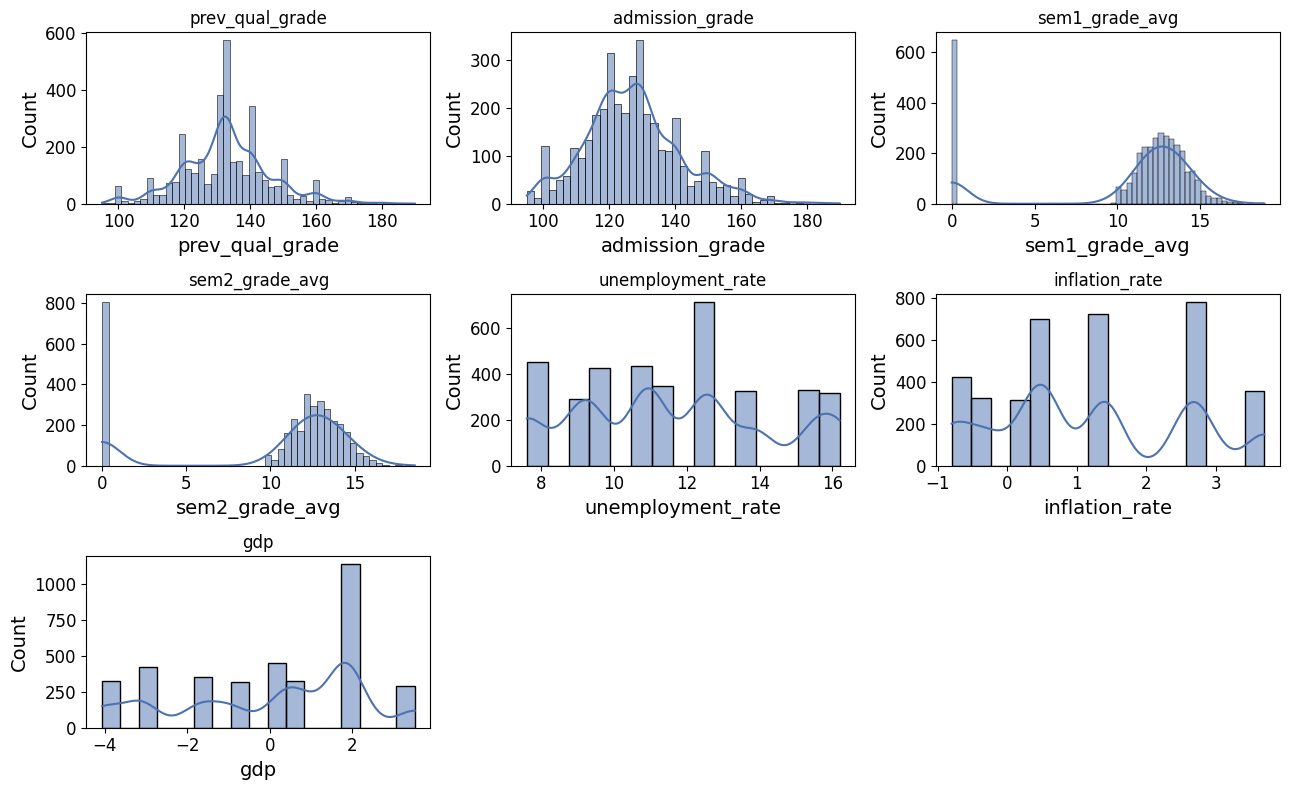

In [57]:
# Let's plot them to get better insights

cont_cols = ["prev_qual_grade", "admission_grade", "sem1_grade_avg", "sem2_grade_avg", "unemployment_rate","inflation_rate","gdp"]

fig, axes = plt.subplots(3, 3, figsize=(13,8))
axes = axes.flatten()

for i, col in enumerate(cont_cols):
  sns.histplot(data = df, x = col, kde = True, color='#4c72b0', ax = axes[i])
  axes[i].set_title(col)

fig.delaxes(axes[7])
fig.delaxes(axes[8])

plt.tight_layout()
plt.show()

The analysis reveals three important aspects in the nature of continuous features we've plotted:

**Individual Variables**: *prev_qual_grade* and *admission_grade* exhibit continuous, Gaussian-like distributions, reflecting the natural variance in individual performance.

**Outcome Indicators**: *sem1_grade_avg* and *sem2_grade_avg* display a highly skewed, bimodal distribution. There is a massive, systemic cluster of observations concentrated near zero, followed by a secondary peak around the mean passing grade (12-14). This dense cluster near zero probably represents students who failed all units or prematurely withdrew. This structure is a direct indicator of the negative class outcome.

**Systemic Variables**: *unemployment_rate*, *inflation_rate*, and *gdp* display discrete, multimodal distributions with low cardinality.

This behavior stems from temporal granularity. Students enrolled in the same academic year share identical macroeconomic metrics; therefore, the histogram peaks represent distinct enrollment cohorts.

Reflecting on the way the model may will learn from data, we can hypotize that it will learn the impact of a specific enrollment year (proxied by its economic indicators) rather than the direct effect of economics on a specific student.

### 3.2 Numerical Discrete variables

Let's now analyse the numerical discrete variables and then categorical ones. Previously we need to create two other lists of variables: one for the numerical discrete variables, and the other for categorical variables.

In [58]:
# Let's define manually the numerical discrete features
ndiscr_cols = [
    'age_enrollment',
    'sem1_units_credited', 'sem1_units_enrolled', 'sem1_units_eval', 'sem1_units_approved', 'sem1_units_no_eval',
    'sem2_units_credited', 'sem2_units_enrolled', 'sem2_units_eval', 'sem2_units_approved', 'sem2_units_no_eval'
]

# I calculate the categorical variables by difference
cols_to_exclude = set(cont_cols + ndiscr_cols + ["target"])

# I create the list of categorical variables
cat_cols = [col for col in df.columns if col not in cols_to_exclude]

Let's check that everything is fine.

In [59]:
# Test
print(f"Total columns: {len(df.columns)}")
print(f"Target: 1")
print(f"Continuous variables: {len(cont_cols)}")
print(f"Discrete numerical: {len(ndiscr_cols)}")
print(f"Categorical: {len(cat_cols)}")

Total columns: 37
Target: 1
Continuous variables: 7
Discrete numerical: 11
Categorical: 18


We can now start to work separately on discrete numerical variables and then on categorical ones.

In [60]:
# We use the describe() function before, to get numerical insights on these variables
df[ndiscr_cols].describe().round(2)

,age_enrollment,sem1_units_credited,sem1_units_enrolled,sem1_units_eval,sem1_units_approved,sem1_units_no_eval,sem2_units_credited,sem2_units_enrolled,sem2_units_eval,sem2_units_approved,sem2_units_no_eval
count,3630.00,3630.00,3630.00,3630.00,3630.00,3630.00,3630.00,3630.00,3630.00,3630.00,3630.00
mean,23.46,0.75,6.34,8.07,4.79,0.13,0.58,6.30,7.76,4.52,0.14
std,7.83,2.48,2.57,4.29,3.24,0.68,2.02,2.26,3.96,3.16,0.75
min,17.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,19.00,0.00,5.00,6.00,3.00,0.00,0.00,5.00,6.00,2.00,0.00
50%,20.00,0.00,6.00,8.00,5.00,0.00,0.00,6.00,8.00,5.00,0.00
75%,25.00,0.00,7.00,10.00,6.00,0.00,0.00,7.00,10.00,6.00,0.00
max,70.00,20.00,26.00,45.00,26.00,12.00,19.00,23.00,33.00,20.00,12.00


[Results descriptions...]

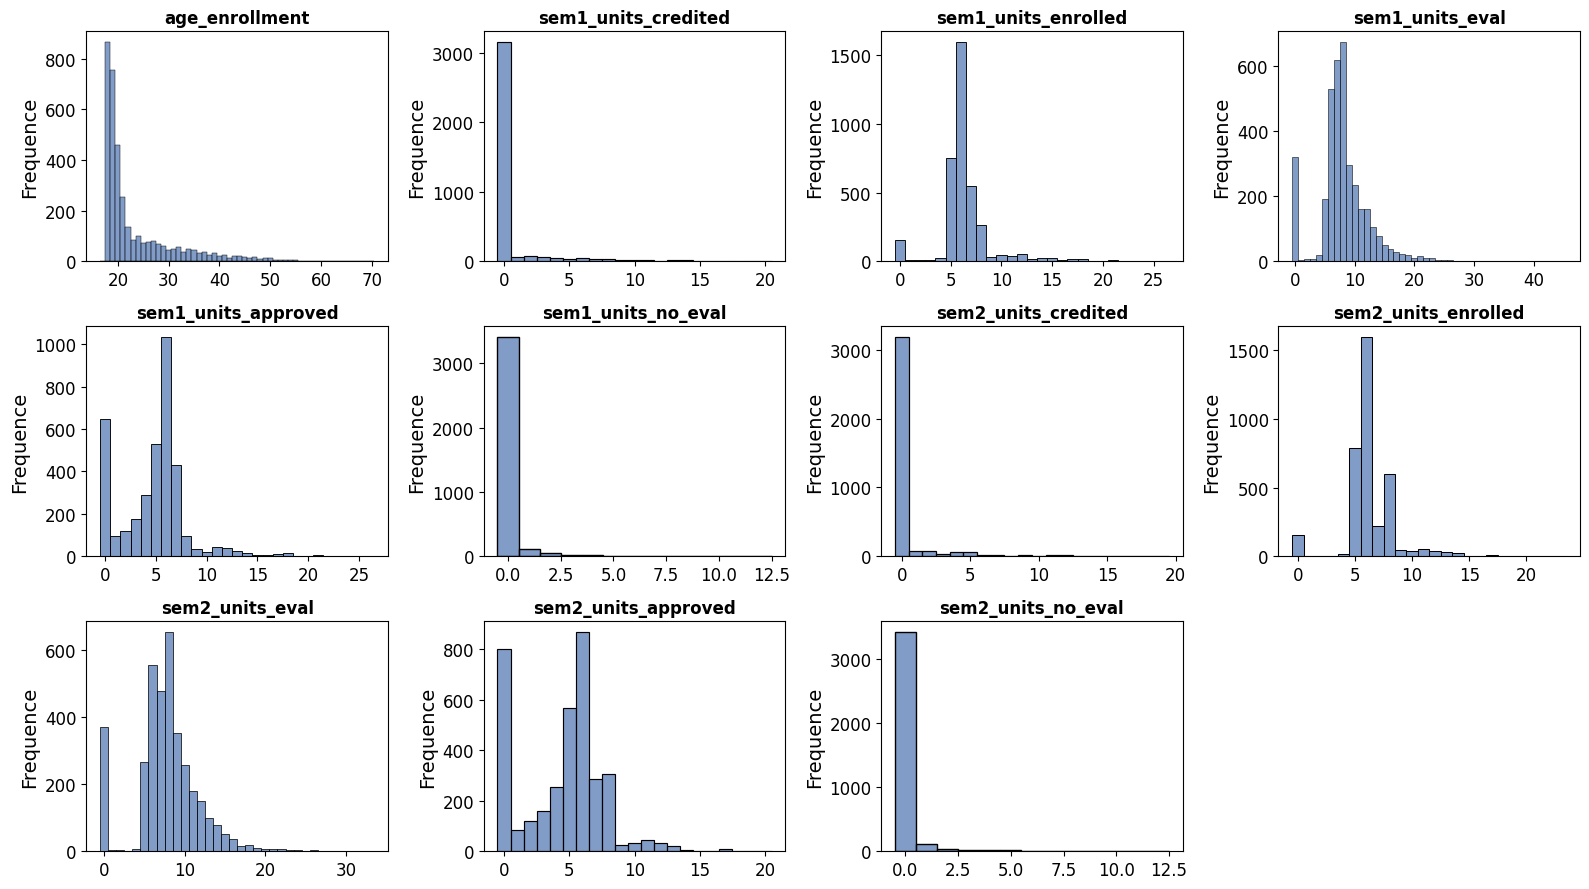

In [61]:
# Let's plot them

n_cols = 4
n_rows = math.ceil(len(ndiscr_cols) / n_cols)
plt.figure(figsize=(16, 9))

for i, col in enumerate(ndiscr_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)

    sns.histplot(data=df, x=col, discrete=True, kde=False, color='#4c72b0', alpha=0.7, ax=ax)

    ax.set_title(col, fontsize=12, fontweight='bold')
    ax.set_xlabel(None)
    ax.set_ylabel("Frequence")

plt.tight_layout()
plt.show()

Most enrollment and performance features follow a unimodal - or bimodal for `sem1_units_approved` and `sem2_units_approved`- with an evident right skew (especially age_enrollment).

Several variables are zero-inflated (e.g. `units_credited` and `units_no_eval`), aspect that may lead to think to drop them. This would be an error, because for the observation different from zero these variables may function as powerfull predictors. For example We can hypothesize that a significant portion of dropouts are students with `sem1_units_no_eval > 0`. This means they are enrolled in courses but did not receive an evaluation. We can term this phenomenon *Passive Academic Ghosting*. If validated, this feature will be an important predictor for our dropout model.

Let's analyze the target distribution for students with `sem1_units_no_eval > 0`:

In [62]:
# We select rows where "sem1_units_no_eval" > 0 and count values of the target for those rows:
df[df["sem1_units_no_eval"] > 0]["target"].value_counts(normalize=True)

,proportion
target,
Dropout,0.553571
Graduate,0.446429


In [63]:
# We need to confront the value 0.55 with the total rate of dropouts in order to evaluate its significance:
df["target"].value_counts(normalize=True)

,proportion
target,
Graduate,0.60854
Dropout,0.39146


Given the sharp contrast between the specific and global dropout rates (0.55 vs. 0.39), we expect this feature to be a critical predictor, confirming what we have supposed before about sparse features.

Furthermore, analyzing `sem1_units_enrolled` and `sem1_units_approved` merely as absolute values limits our interpretability. To capture true academic engagement, we should evaluate the ratio between these variables, quantifying how many units a student successfully completed relative to their initial study plan. We may create a new variable called `approval_rate` in which we capture this relationship. This may lead to a collinearity issue, since the variable will be correlated with the other two. This would be a problem at least in two different scenario:
- In an OLS framework, since this model suffer multicollinearity in coefficients estimation.
- In an inference framework, in which we may be interested to distinguish the more important features.

Given that we're in a classification framework where what we care for is the predictive performance of the model, we can try to create the variable and implement the model with no elimination of collinear features.

Another problem may arise: by creating two new variables (one for the first semester and the other for the second) we're increasing the dimensionality of our dataset, something we need to avoid with SVM (it leads to estimation inefficiences). I don't think we'll end up with too many dimensions, so we'll try this path (see the point 5.1 in the Feature Engeneering section).

### 3.3 Correlation Matrix

Now we can test in general if there is correlation between numerical features and our target by creating a correlation matrix - we include also the continuous variables.

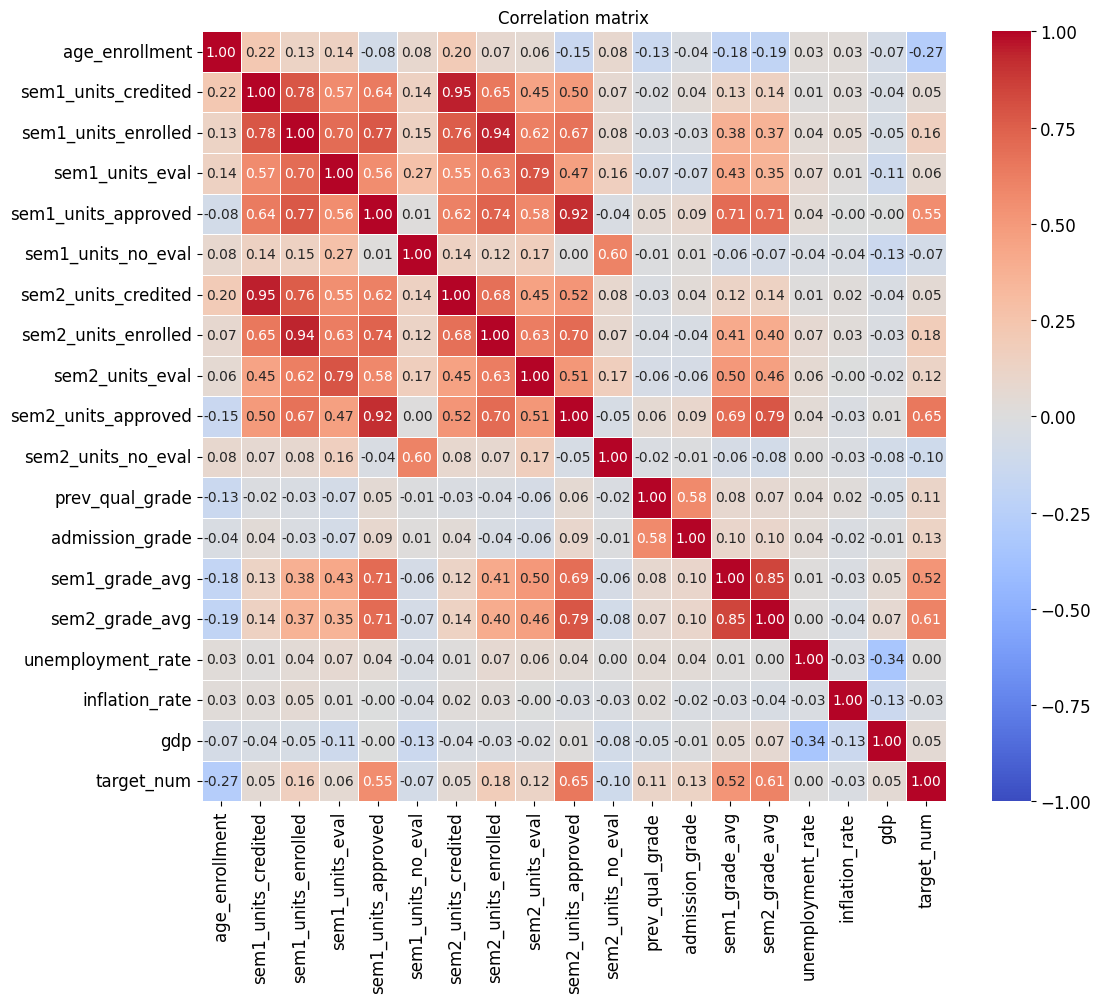

In [64]:
# We need to convert the target in numerical. For doing this we create a copy of the dataframe
df_corr = df.copy()
df_corr["target_num"] = df_corr["target"].map({'Dropout': 0, 'Graduate': 1})

# Let's create the list of numerical features + target
cols_heat = ndiscr_cols + cont_cols + ["target_num"]

# Create the correlation matrix
corr_matrix = df_corr[cols_heat].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap="coolwarm",
            vmin=-1, vmax=1,
            linewidths=0.5)

plt.title("Correlation matrix")
plt.show()


We can derive some relevant insights from this correlation matrix:

- We can see that the variables with higher correlation with the target are the ones relative to the students' performance (`sem1_units_approved`, `sem2_units_approved`, `sem1_grade_avg`, `sem2_grade_avg`, `sem1_approval_rate`, `sem2_approval_rate`). The two features we'll create later (`sem1_approval_rate`, `sem2_approval_rate`) will present for sure a high correlation with the target.

- We can notice a strong positive correlation between the same features of different semesters. This means that they tend to carry the same information to the model. We may opt for eliminating one of the two semesters (this may improve the interpretability of the model and decrease the dimensionality) and create a new variable (`delta`) that captures the improvement (or setback) of students (`sem2` - `sem1`).

- The last important thing to notice is that continuous variables present coefficients close to zero. This may be naively interpreted as a weak relation with the target. But we need to keep in mind that correlation measures the linear relationship between two variables; in this case, we may have a non-linear relationship between them, so it's correct to keep them in our model.

### 3.4 Categorical Variables

Now we proceed to the analysis of categorical features.

In [65]:
# Let's recall the categorical features and check their dimension
print(len(cat_cols), cat_cols)

18 ['marital_status', 'application_mode', 'application_order', 'course_id', 'daytime_attendance', 'prev_qualification', 'nationality', 'mother_qual', 'father_qual', 'mother_occupation', 'father_occupation', 'is_displaced', 'special_needs', 'is_debtor', 'fees_paid', 'gender', 'has_scholarship', 'is_international']


In [66]:
# Let's visualize some statistics and their distribution

# We need to change the type of the categorical variables, since they are represented as codes
df[cat_cols] = df[cat_cols].astype('category')

# Description
df[cat_cols].describe()

,marital_status,application_mode,application_order,course_id,daytime_attendance,prev_qualification,nationality,mother_qual,father_qual,mother_occupation,father_occupation,is_displaced,special_needs,is_debtor,fees_paid,gender,has_scholarship,is_international
count,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630,3630
unique,6,18,7,17,2,17,19,29,34,29,42,2,2,2,2,2,2,2
top,1,1,1,9500,1,1,1,1,37,9,9,1,0,0,1,0,0,0
freq,3199,1408,2461,666,3222,3019,3544,865,1010,1313,847,1993,3590,3217,3144,2381,2661,3544


We can immediately derive some insights:
- Some of the variables have high cardinality, while others are binary. We may handle the formers with encoding techniques after the split.

- `marital_status`, `daytime_attendance`, `prev_qualification`, `nationality`, `special_needs`, `is_debtor`, `is_international` are the variables with the highest unbalance (> 83%). We need to evaluate what is the ideal thresholds for apply some feature -engeneering technique (like remove the variable at all, or group some levels into an `Other` level). For doing this we need to check the distributio of category levels before. We'll do it after the split.

Let's plot the distribution oof non-binary features to see the distribution of observation among different levels:

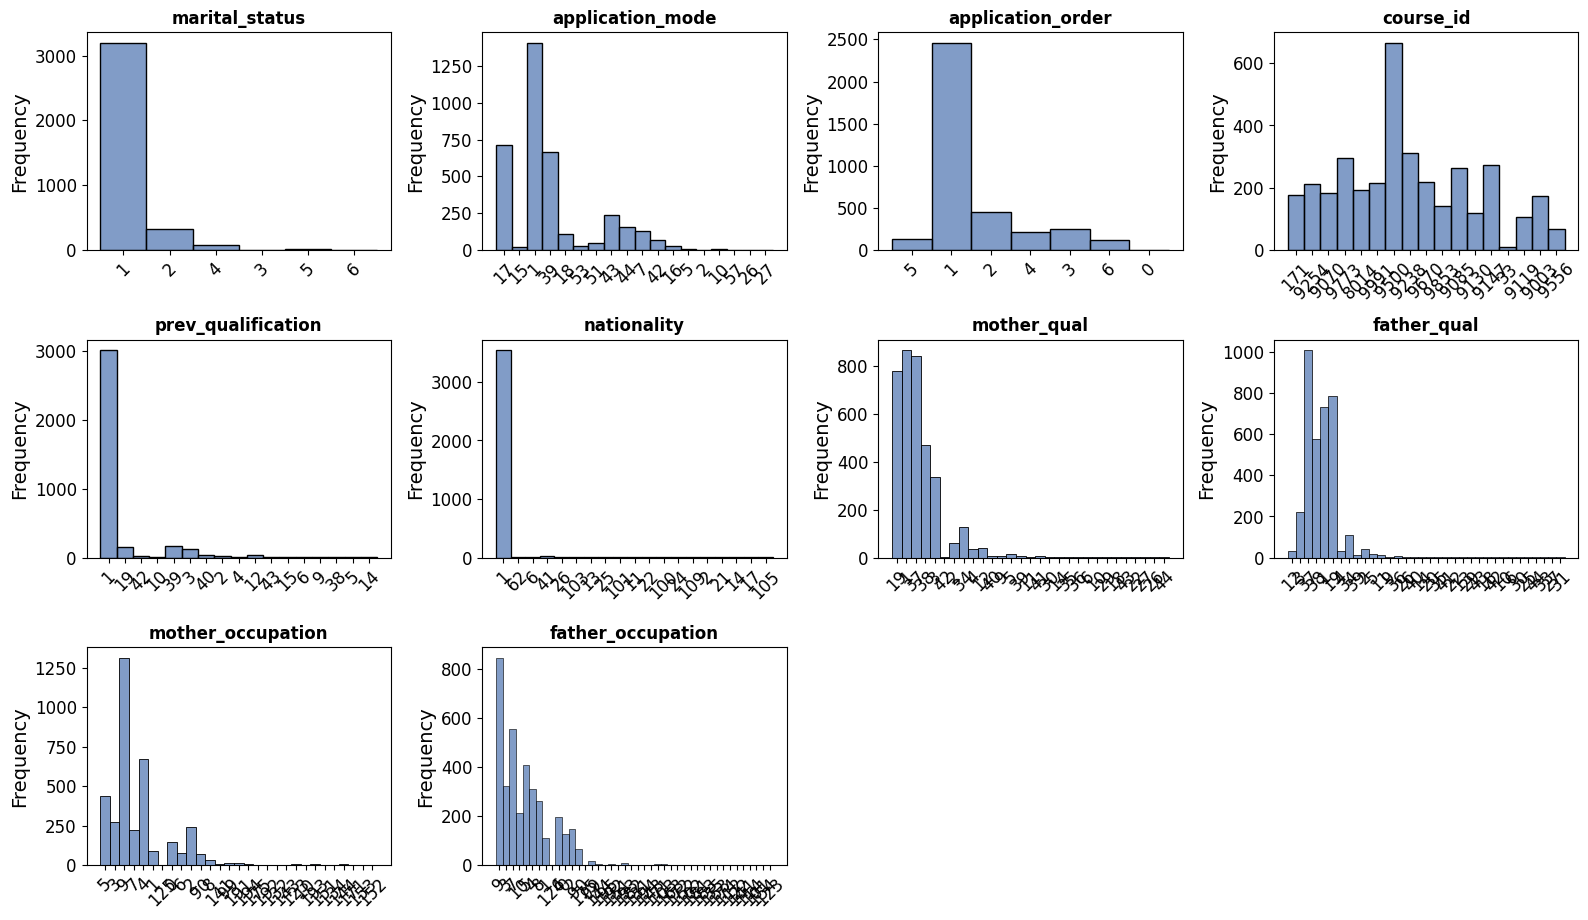

In [67]:
# Let's plot them
n_cols = 4
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(16, 15))

plot_index = 1
for col in cat_cols:

    if df[col].nunique() > 2:

        ax = plt.subplot(n_rows, n_cols, plot_index)
        series_to_plot = df[col].astype(str) # we do this to treat numerical values as categories and have more informative plots
        sns.histplot(x=series_to_plot, discrete=True, kde=False, color='#4c72b0', alpha=0.7, ax=ax)
        ax.set_title(col, fontsize=12, fontweight='bold')
        ax.set_xlabel(None)
        ax.set_ylabel("Frequency")
        ax.tick_params(axis='x', rotation=45)

        plot_index += 1

plt.tight_layout()
plt.show()

Here we can derive othe insights:
- We can immediately see that some variables present high spikes on one level (`marital_status`, `prev_qualification`, `nationality`), while others have a more normal distribution. For the first ones we may consider to group less representative levels in one category `Other`, like we said before. For the other we need to find some encoding techniqe that doesn't increase to much the dimensionality (like binary encoding).

- One remark can be done immediately: we saw that the binary-variable `is_international` has values heavy concentrated on 0 (98%). This means that this variable will be probabily not relevant for the algorithms (they don't learn anything from it). Moreover we see that nationality have values concentrated on 1 (= Portugese). We may opt for dropping tha `is_international` variable and make `nationality` binary (0 = international, 1 = Portugese).

## 4 Train/Test split

We proceed to the split of data:

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate target column:
X = df.drop(columns=["target"])
y = df["target"]

# Transform target to numerical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Check which number correspond to which class
target_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"{target_mapping}")

# Let's make the split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

{'Dropout': np.int64(0), 'Graduate': np.int64(1)}


In [69]:
# Check for dimensions
print(f"\n--- Split Complete ---")
print(f"Train Set shape: {X_train.shape}")
print(f"Test Set shape:  {X_test.shape}")


--- Split Complete ---
Train Set shape: (2904, 36)
Test Set shape:  (726, 36)


Now we proceed on the X_train split for additional transformation.

## 5. Feature Engeneering

### 5.1 Continuous variables

We need to do two main things:
- Given the distributions we've seen before, we need to scale `prev_qual_grade`, `admission_grade`, `sem1_grade_avg`, `sem2_grade_avg`, `unemployment_rate`, `inflation_rate`, `gdp`. By this way we'll end up in a uniform scale variables.
- Then we'll create a new variable (`approval_rate`) for Sem1 and Sem2. This one will be continued.

### 5.2 Categorical variables

First of all we work on cetegorical features.

We've got 18 categorical features of which we want analyse the structure and composition. In particular, we're interested in:
- How many levels thay have.
- Which one of these levels are more representative.

In [70]:
# Let's print the informations. We want to check for the rate and the absolute frequency of each level

for col in cat_cols:
  print(f"--{col.upper()}--")
  print(f"levels: {X_train[col].nunique()}")
  print(X_train[col].value_counts(normalize = True).round(3) * 100)
  print(X_train[col].value_counts())
  print("\n")

--MARITAL_STATUS--
levels: 6
marital_status
1    88.0
2     9.2
4     2.1
5     0.6
6     0.1
3     0.0
Name: proportion, dtype: float64
marital_status
1    2555
2     266
4      61
5      17
6       4
3       1
Name: count, dtype: int64


--APPLICATION_MODE--
levels: 18
application_mode
1     38.6
17    19.6
39    18.4
43     6.5
44     4.3
7      3.7
18     3.2
42     1.7
51     1.2
16     0.8
53     0.7
15     0.6
10     0.3
5      0.2
2      0.1
26     0.0
27     0.0
57     0.0
Name: proportion, dtype: float64
application_mode
1     1122
17     569
39     533
43     188
44     125
7      106
18      92
42      50
51      36
16      24
53      21
15      16
10       9
5        7
2        3
26       1
27       1
57       1
Name: count, dtype: int64


--APPLICATION_ORDER--
levels: 7
application_order
1    67.9
2    12.3
3     6.9
4     6.2
5     3.4
6     3.3
0     0.0
Name: proportion, dtype: float64
application_order
1    1972
2     357
3     199
4     180
5     100
6      95
0     

We need a function that allows us to plot the distribution of specific variables against the target, so to be able to assess the predictive power of them and gain some insights.

In [71]:
# We create a function to plot the target distribution againts a certain variable

def plot_categorical_distribution(X, y, col_name, figsize=(14, 6), rotation=45):
    """
    Plots the distribution of the target variable against a categorical feature
    and prints the corresponding frequency table.

    Parameters:
    - X: Features DataFrame (e.g., X_train)
    - y: Target Series (e.g., y_train)
    - col_name: Name of the column to analyze (e.g., 'mother_qual')
    - figsize: Figure dimensions (default (14, 6))
    - rotation: Rotation of x-axis labels (default 45 degrees)
    """

    # Data Preparation (create a copy to avoid modifying the original dataset)
    df_viz = X.copy()
    df_viz['target'] = y

    # Plot Generation
    plt.figure(figsize=figsize)

    # Order categories by total count descending
    order = df_viz[col_name].value_counts().index

    sns.countplot(
        data=df_viz,
        x=col_name,
        hue='target',
        palette='viridis',
        order=order
    )

    plt.title(f'Target distribution given {col_name}')
    plt.xticks(rotation=rotation)
    plt.ylabel('Number of Students')
    plt.legend(title='Target (0=Drop, 1=Grad)')
    plt.tight_layout()
    plt.show()

    # Frequency Table
    counts_table = pd.crosstab(df_viz[col_name], df_viz['target'])

    # Add a 'Total' column
    counts_table['Total'] = counts_table.sum(axis=1)

    print(f"\n--- Frequency Table for: {col_name} ---")
    # Sort by Total in ascending order (to highlight rare categories first)
    print(counts_table.sort_values('Total', ascending=True))

Let's breakdown the results:
- `marital_status`: here we can group the last three less representative levels (22 obs in total may be just noise or they may lead the model to overfitting). We go for binning the last three levels and proceed with a one-hot encoding for the feature.


- `application_mode`: this is a feature with high cardinality respect to the first. We've got the last 9 levels that in total represent the 2.7% of the observations. Here we may group these 9 levels and opt for a binary encoding. This approach let us control the dimensionality, but has the price of reduce the interpretability of the model (it reduce the number of represented levels). Given the prediction context we can opt for the efficiency of the model rather than its interpretability.

- `application_order`: This is an ordinal variable and we want to preserve the information about the importance of choice. Since the levels of this features are already numerical ordinal, we can leave it as it is. We have poor observation on label = 0, but we leave it as it is for now.

- In `course_id` we have 17 levels distributed pretty equally. Probably it would be useful to do a binary encoding in order to reduce dimensionality. But before it may be useful to visualize the relationship between the target and the variable course_id

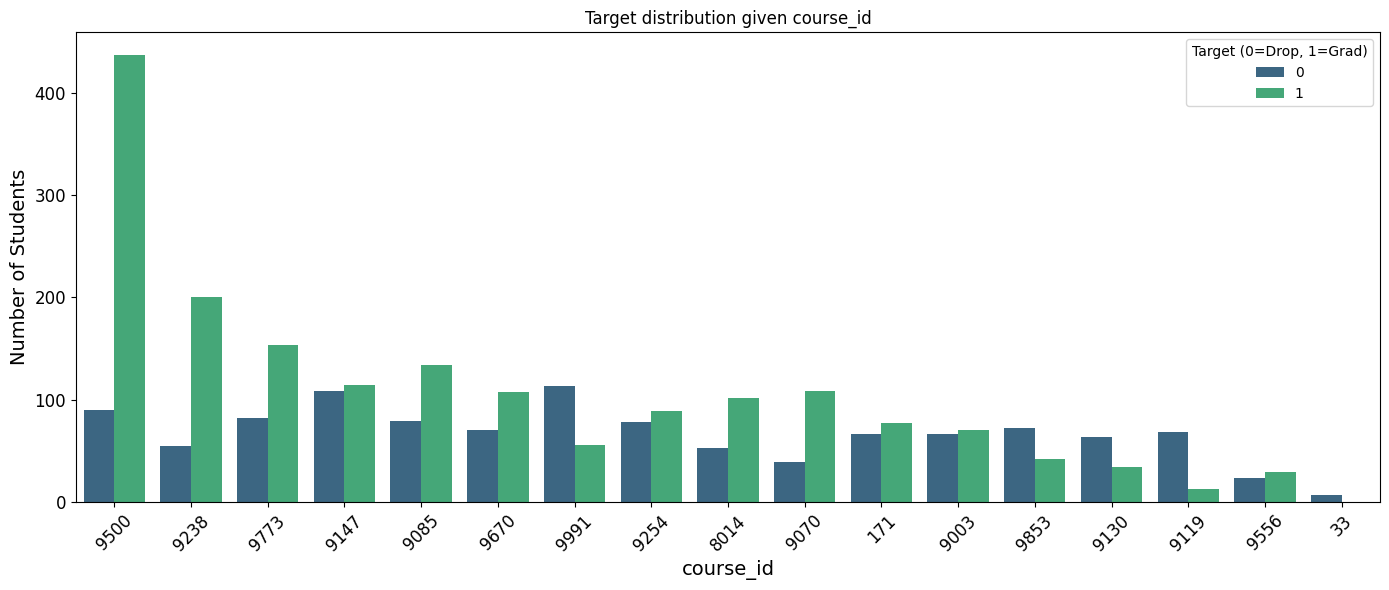


--- Frequency Table for: course_id ---
target       0    1  Total
course_id                 
33           7    0      7
9556        24   29     53
9119        68   13     81
9130        64   34     98
9853        72   42    114
9003        67   70    137
171         67   77    144
9070        39  109    148
8014        53  102    155
9254        78   89    167
9991       113   56    169
9670        70  108    178
9085        79  134    213
9147       109  114    223
9773        82  153    235
9238        55  200    255
9500        90  437    527


In [72]:
# plot of target against course_id
plot_categorical_distribution(X_train, y_train, 'course_id')

- `course_id` seems to be a powerfull feature for dropout prediction. We can see that for some courses (9119: Veterinary Nursing; 9991: Basic Education; 9130: Informatics Engineering; 9853: Journalism and Communication) dropout rates are pretty high, while for others are low. Moreover, the high variance and absolute frequancies make it a strong determinant of success and confirm its robustness. Given these aspects, here the encoding technique we can use is **target encoding**: this technique is very useful when we have a strong correlation between the variable and the target; in other words it allows us to tell explicitely to the algorithm to focus on this feature because it's important.
Something we need to care for is the course with id = 33: here we have poor observations and the algorithm may learn that the risk of dropouts for students enrolled in that course is 100%. We can apply **smoothing** to it in order to mitigate this problem.
In other words we replace `course_id` with `course_risk`, effectively implementing Target Encoding to capture the risk probability associated with each course.

- For `daytime_attendance` we don't need to do any changement because it's already binary. We just need to check its type in order to be sure that it's numerical. If not we'll implement a type casting later.

In [73]:
# check
print(X_train['daytime_attendance'].dtype)

category


- Now we need to treat `prev_qualification`: this is a problematic variable for two main reasons:
1. It has a spike on 1 (1 = secondary education) and many other levels with few observation that we need to manage.
2. In theory this should be an ordinal categorical variable, so with different weights for different levels of education. However, if we check the nature of the feature and its levels we discover that it's more a nominal categorical variable, with numbers representing different aspects of education paths (e.g level 1: secondary education; level 10: 12th year of schooling - not completed etc..).

A possible solution in this case may be the one we adopted for `course_id` variable: we do **target encoding**, replacing the original levels with dropout risk rates for each level. By this way we avoid explicit encoding, we control for dimensionality, and we create the information about; moreover, we can apply smoothing again in order to avoid misspecification of risk rates in cases of few observations.

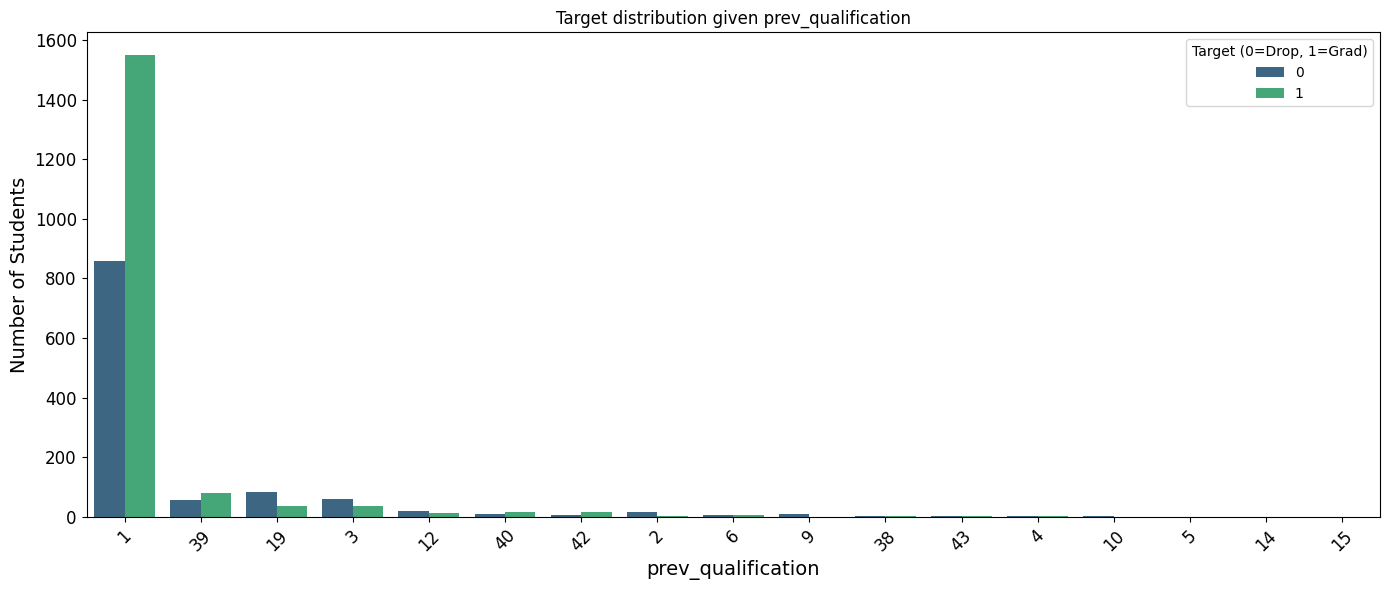


--- Frequency Table for: prev_qualification ---
target                0     1  Total
prev_qualification                  
5                     1     0      1
14                    1     0      1
15                    0     1      1
10                    3     1      4
4                     3     2      5
38                    3     3      6
43                    2     4      6
9                     9     0      9
6                     5     8     13
2                    15     4     19
42                    6    18     24
40                   10    15     25
12                   19    12     31
3                    61    36     97
19                   83    36    119
39                   57    79    136
1                   859  1548   2407


In [74]:
# We can do a countplot before in order to check if there's some correlation between feature and target

plot_categorical_distribution(X_train, y_train, 'prev_qualification')

As we said before, the first thing to notice is that the vast majority of students belong to Level 1 (Secondary Education). The graphic makes clear that for this group the trend is positive, as the number of graduates is much higher than the number of dropouts. However, we can see different patterns in other groups. For example, Level 19 (Basic Education) shows a higher risk of dropout compared to Level 1. This suggests that the student's background is a relevant predictor for the model (this information is robust given the absolute frequencies of that level - 119 in total). The same thing is true for level 3 (Higher education - degree).

We can proceed with **target encoding**.

- Now is the turn of the feature `nationality`. As we said before, here we can create a new binary feature that takes 1 if a student is portugese, and 0 if a student is international. Here we can drop is_international column.

- For `mother_qual` the idea is the same of `prev_qualification`. We want to mitigate dimensionality problem and preserve the idea of risk associated to the mothers' background. Let's check the relationship with the target and its absolute frequencies in order to have a more clear idea.

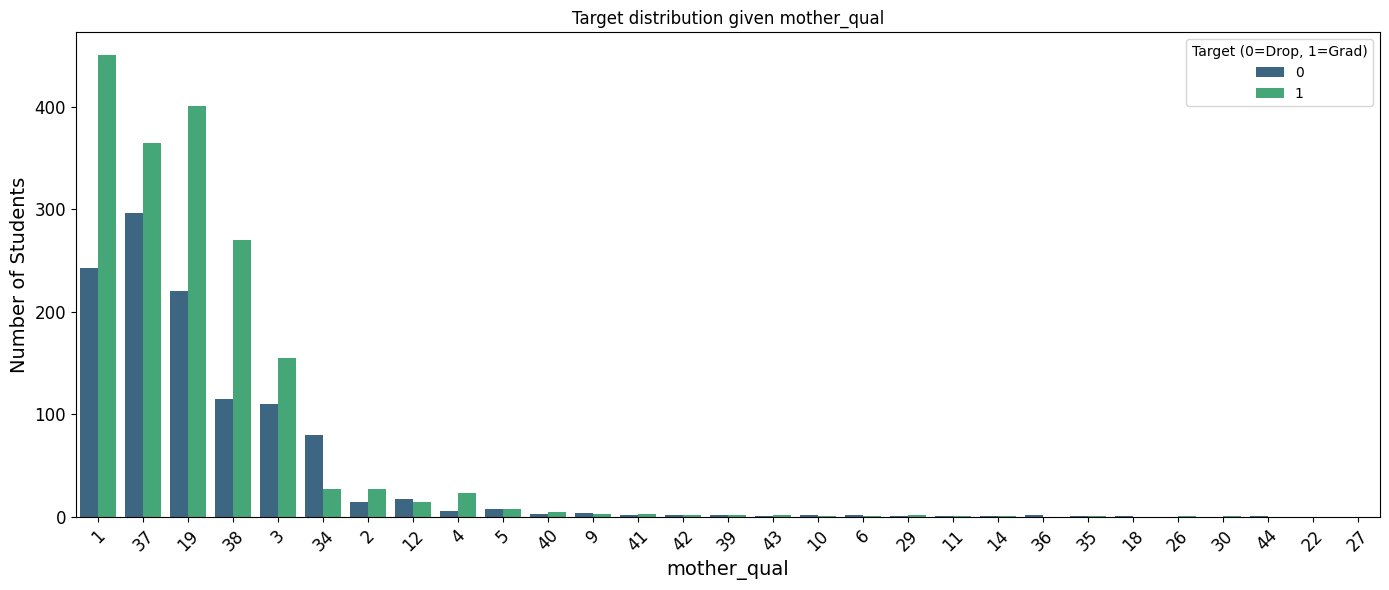


--- Frequency Table for: mother_qual ---
target         0    1  Total
mother_qual                 
26             0    1      1
30             0    1      1
18             1    0      1
44             1    0      1
14             1    1      2
36             2    0      2
35             1    1      2
11             1    1      2
43             1    2      3
10             2    1      3
29             1    2      3
6              2    1      3
42             2    2      4
39             2    2      4
41             2    3      5
9              4    3      7
40             3    5      8
5              8    8     16
4              6   23     29
12            18   15     33
2             15   27     42
34            80   27    107
3            110  155    265
38           115  270    385
19           220  401    621
37           296  365    661
1            243  450    693


In [75]:
# Plot the distribution of target against mother_qual
plot_categorical_distribution(X_train, y_train, 'mother_qual')

There are a few dominant categories (such as levels 1, 37, and 19) that cover the majority of the dataset, followed by a long tail of rare categories. Many of these rare levels (e.g. levels 5, 44, or 27) have fewer than 10 observations. This scarcity of data makes it risky to use the raw categories directly, as the model could learn incorrect patterns from just one or two specific cases.

Despite the imbalance, the variable shows strong predictive power. For instance, we can clearly see that Level 19 implies a much higher risk of dropout (the blue bar is proportionally very high) compared to Level 37, where the number of graduates is significantly larger.

Instead of manually grouping these rare levels into a generic "Other" category—which would mix very different education levels (like Doctorates and lower levels) together—we applied Target Encoding with Smoothing.

- The strategy for `father_qual` should be the same we applied for `mother_qual` - distributions was very similar. Let's check visually the relationship with the target and absolute frequencies.

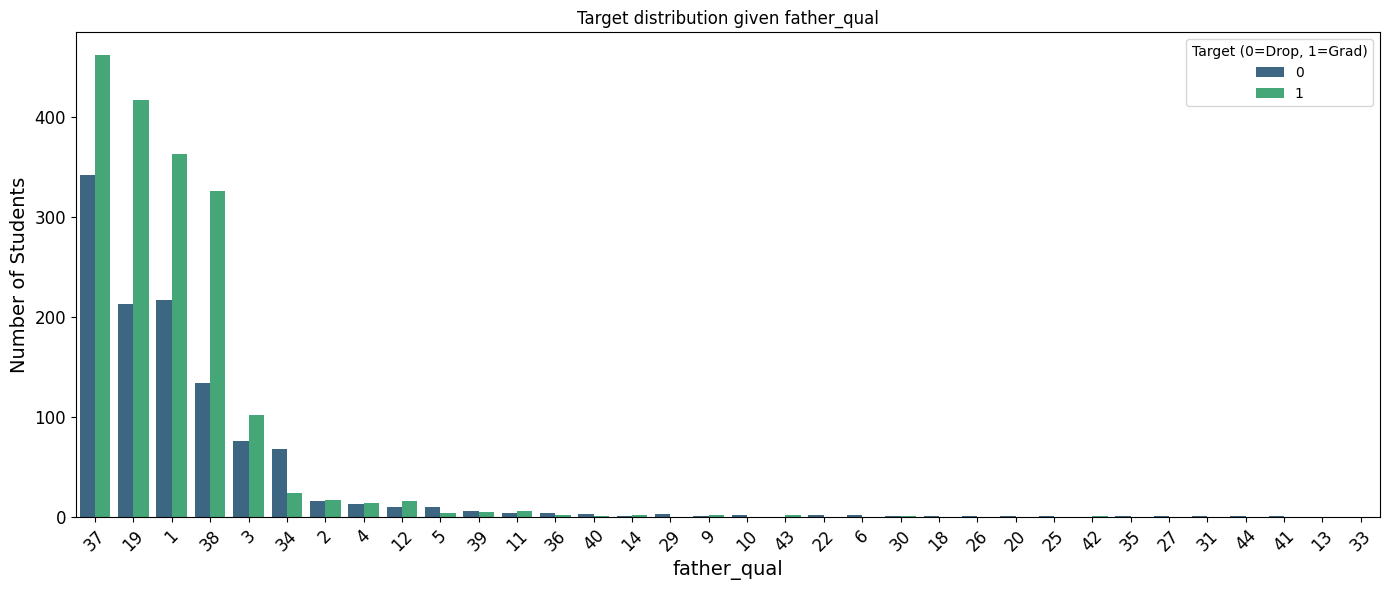


--- Frequency Table for: father_qual ---
target         0    1  Total
father_qual                 
20             1    0      1
25             1    0      1
18             1    0      1
44             1    0      1
31             1    0      1
35             1    0      1
27             1    0      1
26             1    0      1
41             1    0      1
42             0    1      1
30             1    1      2
10             2    0      2
22             2    0      2
6              2    0      2
43             0    2      2
9              1    2      3
14             1    2      3
29             3    0      3
40             3    1      4
36             4    2      6
11             4    6     10
39             6    5     11
5             10    4     14
12            10   16     26
4             13   14     27
2             16   17     33
34            68   24     92
3             76  102    178
38           134  326    460
1            217  363    580
19           213  417    630
3

In [76]:
# Visualization
plot_categorical_distribution(X_train, y_train, 'father_qual')

The distribution of `father_qual` mirrors that of the mother's qualification. While the majority of students fall into a few large categories (levels 37, 19, and 1), there are over 20 categories with extremely low frequencies (often fewer than 3 students per group).

However, the variable contains valuable information. By looking at the medium-sized groups, we can spot clear differences in performance. For example, Level 34 shows a worrying trend: nearly 74% of students in this group dropped out (68 out of 92), whereas in Level 19, the majority of students successfully graduated.

The presence of so many "micro-categories" (like levels 20, 25, or 18, which have only 1 student each) creates a significant risk of noise. A model might incorrectly learn that a specific qualification guarantees dropout just because the only student with that background happened to leave. To fix this, we'll apply Target Encoding with Smoothing, like we did for other features.

For `mother_occupation` and `father_occupation` we can follow the same strategy adopted for the last features.

For the last variables we don't need any modification, since they're already binary.

### 5.2 Transformation and Scaling

In [77]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2904 entries, 244 to 1278
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   marital_status       2904 non-null   category
 1   application_mode     2904 non-null   category
 2   application_order    2904 non-null   category
 3   course_id            2904 non-null   category
 4   daytime_attendance   2904 non-null   category
 5   prev_qualification   2904 non-null   category
 6   prev_qual_grade      2904 non-null   float64 
 7   nationality          2904 non-null   category
 8   mother_qual          2904 non-null   category
 9   father_qual          2904 non-null   category
 10  mother_occupation    2904 non-null   category
 11  father_occupation    2904 non-null   category
 12  admission_grade      2904 non-null   float64 
 13  is_displaced         2904 non-null   category
 14  special_needs        2904 non-null   category
 15  is_debtor            290

Now we need to develop all the insight seen until now:

In [78]:
# Let's import some useful libraries for pipeline building
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import TargetEncoder
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, OrdinalEncoder, FunctionTransformer
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

In [79]:
# --- CLASS & FUNCTIONS ---

# For `application_mode` we need a specific class that groups levels in a specific level called `Other`
class App_mode_LabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=35, replace_with="Other"):
        self.threshold = threshold
        self.replace_with = replace_with
        self.frequent_labels_ = None

    def fit(self, X, y=None):
        # Be sure that X is a dataframe
        if isinstance(X, np.ndarray):
	        X = pd.DataFrame(X)

        # Calculate frequencies on the first column
        counts = X.iloc[:, 0].value_counts()
        self.frequent_labels_ = counts[counts >= self.threshold].index.tolist()
        return self

    def transform(self, X):
        if isinstance(X, np.ndarray): X = pd.DataFrame(X)
        X_transformed = X.copy()

        # Who's not in the 'frequent' list becomes 'Other'
        mask = ~X_transformed.iloc[:, 0].isin(self.frequent_labels_)
        X_transformed.loc[mask, X_transformed.columns[0]] = self.replace_with
        return X_transformed

# ------------------------------------------------------------------------------


# With this othe class we'll create the two new variables `approval_rate` for Sem1 and Sem2
class ApprovalRateCreator(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # We work on a copy
        X = X.copy()

        # 1. New variables calculation
        X["sem1_approval_rate"] = X["sem1_units_approved"] / X["sem1_units_enrolled"]
        X["sem2_approval_rate"] = X["sem2_units_approved"] / X["sem2_units_enrolled"]

        # 2. Clean and NaN substitution
        X[["sem1_approval_rate", "sem2_approval_rate"]] = X[["sem1_approval_rate", "sem2_approval_rate"]].fillna(0)

        # Inf substitution
        X[["sem1_approval_rate", "sem2_approval_rate"]] = X[["sem1_approval_rate", "sem2_approval_rate"]].replace([np.inf, -np.inf], 0)

        return X


# ------------------------------------------------------------------------------


# For daytime_attendence we create a function that casts the categorical type into a numerical one
def cast_to_int(x):
    # Trasforma stringhe o booleani in interi
    return x.astype(int)


# ------------------------------------------------------------------------------


# For `nationality` we need a function that separate values in is_portugese == 1/ is_international == 0

def create_portuguese_flag(X):
    # We convert X in a DF in order to be able to use names
    if isinstance(X, np.ndarray):
        X = pd.DataFrame(X, columns=['nationality', 'is_international'])

    # Create binary series
    is_portuguese = (X['nationality'] == 1).astype(int)

    # Return the output column
    return is_portuguese.values.reshape(-1, 1)

In [89]:
# Now for each list of variables of our interest we set the relative sub-pipeline
# Next, we'll use the ColumnTransformer function to apply each pipelin to specific columns

# --- A. CUSTOM PIPELINES ---

# 1.
marital_status = ['marital_status']

pipe_ohe = Pipeline([
    ('imputer', SimpleImputer()),
    ('ohe', OneHotEncoder(min_frequency=25, handle_unknown='infrequent_if_exist', sparse_output=False))
])

# 2.
application_mode = ['application_mode']

pipe_application_mode = Pipeline([
    ('imputer', SimpleImputer()),
    ('grouping', App_mode_LabelEncoder(threshold=35, replace_with='Other')),
    ('binary_enc', BinaryEncoder())
])

# 3.
nationality = ['nationality', 'is_international']

pipe_nationality = Pipeline([
 	('imputer', SimpleImputer(strategy='most_frequent')),
 	('transformer', FunctionTransformer(create_portuguese_flag, validate=False))
 	])

# 4.
daytime_attendance = ['daytime_attendance']

cast_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('caster', FunctionTransformer(cast_to_int, validate=False))
    ])

 # 5.
application_order = ['application_order']

pipe_application_order = Pipeline([
	('imputer', SimpleImputer(strategy='most_frequent')),
	('scaler', MinMaxScaler())
])


# --- B. TARGET ENCODING PIPELINES ---

# 1.
target_enc_cols = ['course_id', 'prev_qualification', 'mother_qual',
                   'father_qual', 'mother_occupation', 'father_occupation']

target_enc_step = TargetEncoder(smoothing=10, min_samples_leaf=1, handle_missing='value', handle_unknown='value')

pipe_target_enc = Pipeline([
	('imputer', SimpleImputer()),
	('target_enc', target_enc_step),
	('scaler', StandardScaler())
	])

# --- C. OTHER ---

# 1.
sparse_cols = ['sem1_grade_avg', 'sem2_grade_avg']

pipe_sparse_normal = Pipeline([
	('imputer', SimpleImputer(strategy='constant', fill_value=0)),
	('scaler', RobustScaler())
	])

# 2.
zero_infl_cols = ['sem1_units_credited', 'sem2_units_credited',
                  'sem1_units_no_eval', 'sem2_units_no_eval']

pipe_zero_inf = Pipeline([
	('imputer', SimpleImputer(strategy='constant', fill_value=0)),
	('scaler', MinMaxScaler())
	])

# 3.
binary_cols = ['is_displaced', 'special_needs', 'is_debtor',
               'fees_paid', 'gender', 'has_scholarship'] # Changed 'gender18' to 'gender'

pipe_bin_vars = Pipeline([
	('imputer', SimpleImputer(strategy='most_frequent'))
	])

# 4.
standard_cols = ['prev_qual_grade', 'admission_grade', 'age_enrollment',
                 'sem1_units_enrolled', 'sem1_units_eval', 'sem1_units_approved',
                 'sem2_units_enrolled', 'sem2_units_eval', 'sem2_units_approved',
                 'unemployment_rate', 'inflation_rate', 'gdp', 'sem1_approval_rate', 'sem2_approval_rate']

pipe_std = Pipeline ([
 	('imputer', SimpleImputer()),
 	('scaler', StandardScaler())
 	])

Now we use `ColumnTransformer()` in order to assemble the various pipelines:

In [90]:
preprocessor = ColumnTransformer(
    transformers=[
        # --- A. Custom Pipelines ---
        ('marital', pipe_ohe, marital_status),
        ('app_mode', pipe_application_mode, application_mode),
        ('nation', pipe_nationality, nationality),
        ('daytime', cast_pipeline, daytime_attendance),
        ('app_order', pipe_application_order, application_order),

        # --- B. Target Encoding ---
        ('target_enc', pipe_target_enc, target_enc_cols),

        # --- C. Numerical / Other ---
        ('sparse_vars', pipe_sparse_normal, sparse_cols),
        ('zero_infl', pipe_zero_inf, zero_infl_cols),
        ('binary', pipe_bin_vars, binary_cols),
        ('standard', pipe_std, standard_cols)
    ],
    remainder='drop',
    verbose_feature_names_out=False
)

## 6 Model training

In [97]:
# Import main libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

Now we can build the final pipeline:

In [92]:
# full_pipeline

full_pipeline = Pipeline(steps=[
    ('feature_generation', ApprovalRateCreator()),
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

/tmp/ipython-input-1275791046.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_transformed.loc[mask, X_transformed.columns[0]] = self.replace_with


/tmp/ipython-input-1275791046.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_transformed.loc[mask, X_transformed.columns[0]] = self.replace_with
/tmp/ipython-input-1275791046.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Other' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  X_transformed.loc[mask, X_transformed.columns[0]] = self.replace_with



--- PERFORMANCE DEL MODELLO ---
Accuracy: 0.9146

--- PERFORMANCE DEL MODELLO ---
Accuracy: 0.9146

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       284
           1       0.90      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.91      0.91       726


--- Matrice di Confusione ---


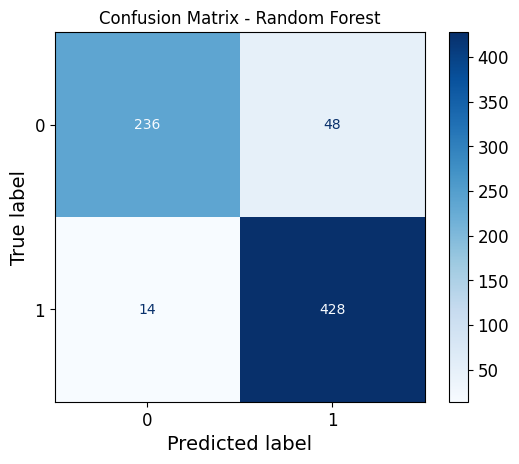

In [98]:
full_pipeline.fit(X_train, y_train)
y_pred = full_pipeline.predict(X_test)

print("\n--- PERFORMANCE DEL MODELLO ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n--- PERFORMANCE DEL MODELLO ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# 6. Matrice di Confusione Grafica
print("\n--- Matrice di Confusione ---")
ConfusionMatrixDisplay.from_estimator(full_pipeline, X_test, y_test, cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

We compare here three models: Logistic Regression, SVM and Random Forests.

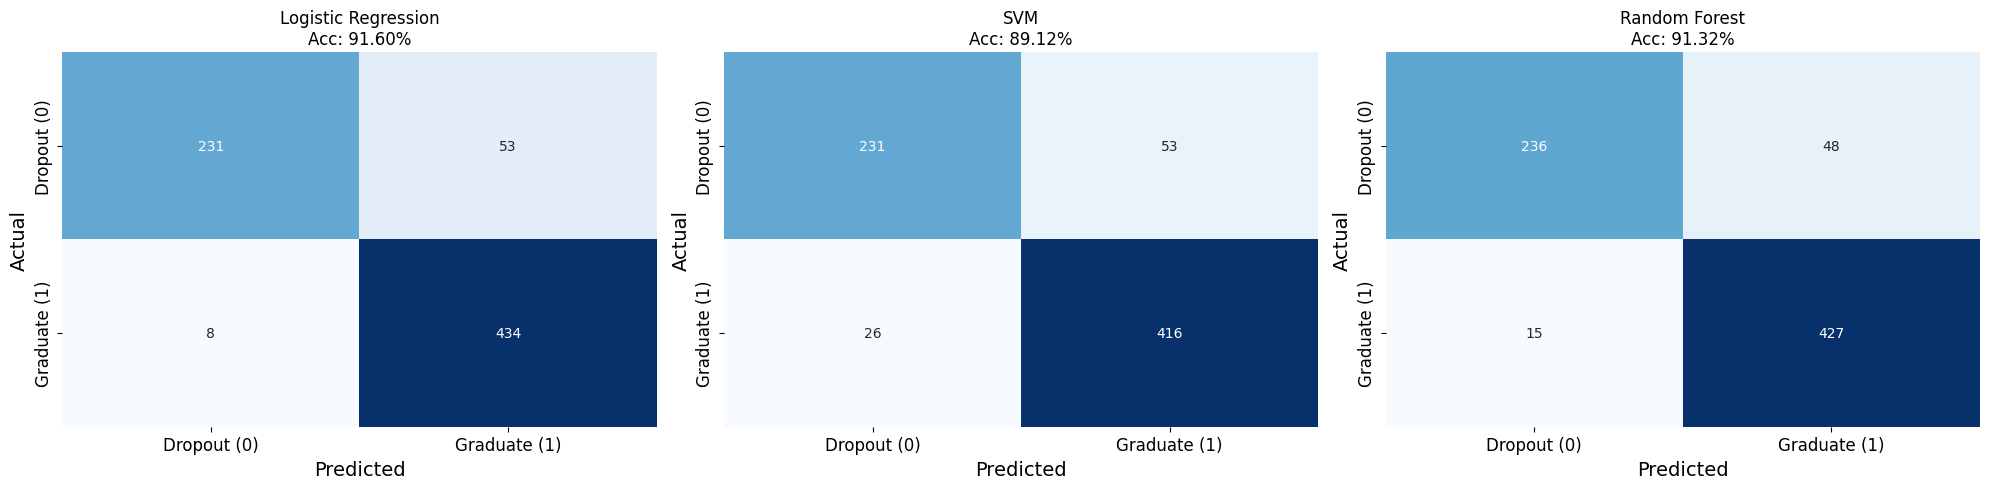

In [ ]:
# Define the models
models = {
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "SVM": SVC(kernel='rbf', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Setup the plot
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i, (name, model) in enumerate(models.items()):
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Accuracy
    acc = accuracy_score(y_test, y_pred)

    # Compute Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], cbar=False,
                xticklabels=['Dropout (0)', 'Graduate (1)'],
                yticklabels=['Dropout (0)', 'Graduate (1)'])

    axes[i].set_title(f"{name}\nAcc: {acc:.2%}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")

plt.tight_layout()
plt.show()

The experimental results are highly satisfactory, with all three models achieving an accuracy close to or above 90%.

Surprisingly, the Logistic Regression achieved the highest overall accuracy (91.60%). This result highlights the effectiveness of the preprocessing phase: by applying Target Encoding and Scaling, we successfully linearized the relationships between categorical features (like `course_id` or `father_qual`) and the target variable, allowing a simple linear model to perform exceptionally well.

However, when looking at the business objective (identifying students at risk of dropout), the Random Forest deserves special attention. Analyzing the Confusion Matrices, Random Forest produced the lowest number of False Negatives (48 vs 53 for Logistic Regression). This means it is the best model for capturing the 'Dropout' signal, minimizing the risk of ignoring a student who is actually about to leave.

While Logistic Regression offers the best general accuracy and interpretability, Random Forest is slightly more robust in detecting the critical class (Dropouts).

So, now, we can do a bit of fine-tuning of RandomForest model, just for checking if it can obtain better results. We'll use GridsearchCV for checking how the performance vary at varying of parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# We'll check for n_estimators, max_depth, min_sample_split and min_samples_leaf
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 15, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set the research
rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)

# Results
print(f"\nBest parameters: {rf_grid.best_params_}")
print(f"Best score (mean on Train set): {rf_grid.best_score_:.4f}")

# Evaluate the best model on Test set
best_rf = rf_grid.best_estimator_
y_pred_tuned = best_rf.predict(X_test)
acc_tuned = accuracy_score(y_test, y_pred_tuned)

print("-" * 40)
print(f"Final accuracy: {acc_tuned:.4f}")
print("-" * 40)

# Confront with the base model
print("Classification Report (Tuned Model):")
print(classification_report(y_test, y_pred_tuned))

Fitting 5 folds for each of 81 candidates, totalling 405 fits

Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best score (mean on Train set): 0.9149
----------------------------------------
Final acuracy: 0.9132
----------------------------------------
Classification Report (Tuned Model):
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       284
           1       0.90      0.97      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.92      0.91      0.91       726



The Grid Search process explored 405 different combinations of parameters using 5-fold Cross-Validation.

The most significant result is the perfect alignment between the training score (91.49%) and the final test accuracy (91.32%). The negligible gap (0.17%) confirms that the model is not overfitting and generalizes well to unseen data.

The best performance was achieved with n_estimators=300 and max_depth=None. This indicates that the model benefits from a larger ensemble of fully grown trees to capture complex patterns, while the averaging mechanism of the Random Forest prevents overfitting.

Since the tuned model provides the same high accuracy as the baseline but with guaranteed stability (validated by Cross-Validation), we select this optimized Random Forest as our final model.